In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import cv2

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

data_dir = 'C:/Windows/System32/kwontest/unsupervised'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

train_transform = transforms.Compose([transforms.Resize((256,256)),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

validation_transform = transforms.Compose([transforms.Resize((256,256)),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

test_transform = transforms.Compose([transforms.Resize((256,256)),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

# TODO: Load the datasets with ImageFolder
train_dataset = datasets.ImageFolder(train_dir, transform = train_transform)
validation_dataset = datasets.ImageFolder(valid_dir, transform = validation_transform)
test_dataset = datasets.ImageFolder(test_dir, transform = test_transform)

# TODO: Using the image datasets and the trainforms, define the dataloaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 32, shuffle = True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size = 16)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 16)

classes =[ 'classic', 'natural', 'industrial', 'retro']


In [2]:
class ConvAutoEncoder(nn.Module):
    def __init__(self):
        super(ConvAutoEncoder, self).__init__()
        
        # Encoder
        self.cnn_layer1 = nn.Sequential(
                        nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
                        nn.ReLU(),
                         nn.MaxPool2d(2,2))

        self.cnn_layer2 = nn.Sequential(
                                nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
                                nn.ReLU(),
                                 nn.MaxPool2d(2,2))
        self.cnn_layer3 = nn.Sequential(
                                nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
                                nn.ReLU(),
                                 nn.MaxPool2d(2,2))
        self.cnn_layer4 = nn.Sequential(
                                nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
                                nn.ReLU(),
                                 nn.MaxPool2d(2,2))

        # Decoder
        self.tran_cnn_layer1 = nn.Sequential(
                        nn.ConvTranspose2d(128, 64, kernel_size = 2, stride = 2, padding=0),
                        nn.ReLU())
        self.tran_cnn_layer2 = nn.Sequential(
                        nn.ConvTranspose2d(64, 32, kernel_size = 2, stride = 2, padding=0),
                        nn.ReLU())
        self.tran_cnn_layer3 = nn.Sequential(
                        nn.ConvTranspose2d(32, 16, kernel_size = 2, stride = 2, padding=0),
                        nn.ReLU())

        self.tran_cnn_layer4 = nn.Sequential(
                        nn.ConvTranspose2d(16, 3, kernel_size = 2, stride = 2, padding=0),
                        nn.Sigmoid())
            
            
    def forward(self, x):
        output = self.cnn_layer1(x)
        output = self.cnn_layer2(output)
        output = self.cnn_layer3(output)
        output = self.cnn_layer4(output)
        output = self.tran_cnn_layer1(output)
        output = self.tran_cnn_layer2(output)
        output = self.tran_cnn_layer3(output)
        output = self.tran_cnn_layer4(output)

        return output

In [3]:
args = {
	'BATCH_SIZE': 64,
        'LEARNING_RATE': 0.001,
        'NUM_EPOCH': 100
        }

In [4]:
model = ConvAutoEncoder()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=args['LEARNING_RATE'])

In [5]:
steps = 0
total_steps = len(train_loader)
for epoch in range(args['NUM_EPOCH']):
    running_loss = 0
    for i, (X_train, _) in enumerate(train_loader):
        steps += 1

        outputs = model(X_train)
        loss = criterion(outputs, X_train)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        running_loss += loss.item()*X_train.shape[0]
        
        if steps % total_steps == 0:
            model.eval()
            print('Epoch: {}/{}'.format(epoch+1, args['NUM_EPOCH']),
                 'Training loss: {:.5f}..'.format(running_loss/total_steps))
            
            steps = 0
            running_loss = 0
            model.train()

Epoch: 1/100 Training loss: 46.34108..
Epoch: 2/100 Training loss: 40.45744..
Epoch: 3/100 Training loss: 35.21503..
Epoch: 4/100 Training loss: 33.46051..
Epoch: 5/100 Training loss: 32.81386..
Epoch: 6/100 Training loss: 32.17688..
Epoch: 7/100 Training loss: 31.55935..
Epoch: 8/100 Training loss: 31.22664..
Epoch: 9/100 Training loss: 30.79894..
Epoch: 10/100 Training loss: 29.41170..
Epoch: 11/100 Training loss: 28.69138..
Epoch: 12/100 Training loss: 28.15847..
Epoch: 13/100 Training loss: 27.04285..
Epoch: 14/100 Training loss: 26.43120..
Epoch: 15/100 Training loss: 25.52138..
Epoch: 16/100 Training loss: 25.13082..
Epoch: 17/100 Training loss: 24.99390..
Epoch: 18/100 Training loss: 24.87162..
Epoch: 19/100 Training loss: 24.77056..
Epoch: 20/100 Training loss: 24.69399..
Epoch: 21/100 Training loss: 24.63203..
Epoch: 22/100 Training loss: 24.56528..
Epoch: 23/100 Training loss: 24.50317..
Epoch: 24/100 Training loss: 24.45041..
Epoch: 25/100 Training loss: 24.39931..
Epoch: 26

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

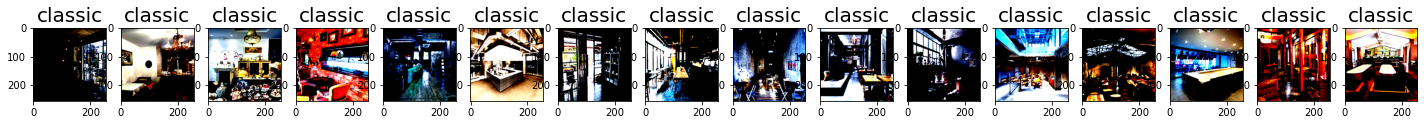

In [6]:
test_images, test_labels = next(iter(test_loader))

fig = plt.figure(figsize=(100,3))
for i, img, label in zip(range(args['BATCH_SIZE']), test_images, test_labels):
    numpy_img = np.transpose(img.detach().numpy(), (1, 2, 0))
    ax = fig.add_subplot(1, args['BATCH_SIZE'], i+1)
    ax.imshow(numpy_img)
    title = classes[int(label)]
    ax.set_title(title, fontsize=20)
plt.show()

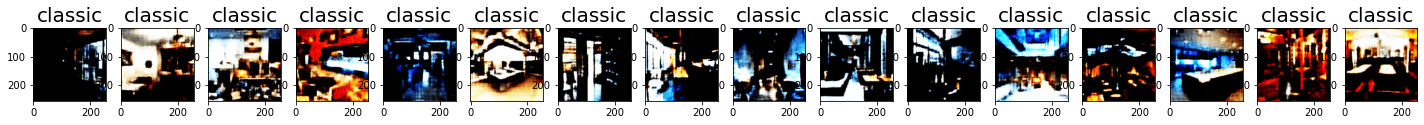

In [7]:
test_output = model(test_images)

fig = plt.figure(figsize=(100,3))
for i, img, label in zip(range(args['BATCH_SIZE']), test_output, test_labels):
    numpy_img = np.transpose(img.detach().numpy(), (1, 2, 0))
    ax = fig.add_subplot(1, args['BATCH_SIZE'], i+1)
    ax.imshow(numpy_img)
    title = classes[int(label)]
    ax.set_title(title, fontsize=20)
plt.show()

In [8]:
torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss
            }, 'C:/Windows/System32/kwontest/unsupervised/checkpoint')

In [9]:
model = ConvAutoEncoder()

optimizer = torch.optim.Adam(model.parameters(), lr=args['LEARNING_RATE'])

checkpoint = torch.load('C:/Windows/System32/kwontest/unsupervised/checkpoint')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

In [15]:
model.train()

ConvAutoEncoder(
  (cnn_layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (cnn_layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (cnn_layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (cnn_layer4): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (tran_cnn_layer1): Sequential(
    (0): ConvTranspose2d(128, 64, kernel_size=(2, 2), stride=(2, 2))
    (1): ReLU()
  )
  (tran_cnn_layer2): Sequential(
